Importing Dependancies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [12]:
titanic_dataset=pd.read_csv('/content/train.csv')

In [13]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
titanic_dataset.shape

(891, 12)

In [19]:
titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 Dropping the cabin column

In [20]:
titanic_dataset=titanic_dataset.drop(columns='Cabin',axis=1)

Replacing all the missing values with mean value in Age column

In [21]:
titanic_dataset['Age'].fillna(titanic_dataset['Age'].mean(),inplace=True)

Replacing the missiong values with mode with Embarked column

In [27]:
print(titanic_dataset['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [28]:
titanic_dataset['Embarked'].fillna(titanic_dataset['Embarked'].mode()[0],inplace=True)

In [29]:
titanic_dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis

In [ ]:
#getting some statistical measures of the dataset

In [17]:
titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
titanic_dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Data Visualization

<Axes: xlabel='Survived', ylabel='count'>

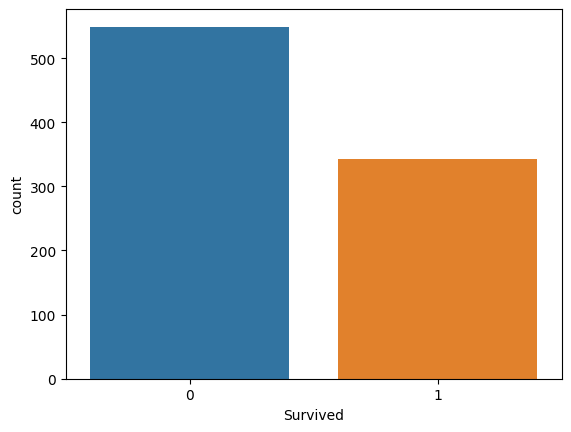

In [31]:
sns.countplot(x=titanic_dataset['Survived'])

<Axes: xlabel='Sex', ylabel='count'>

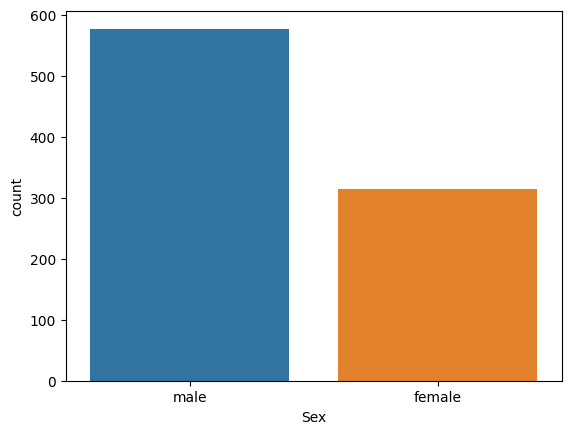

In [32]:
sns.countplot(x=titanic_dataset['Sex'])

<Axes: xlabel='Sex', ylabel='count'>

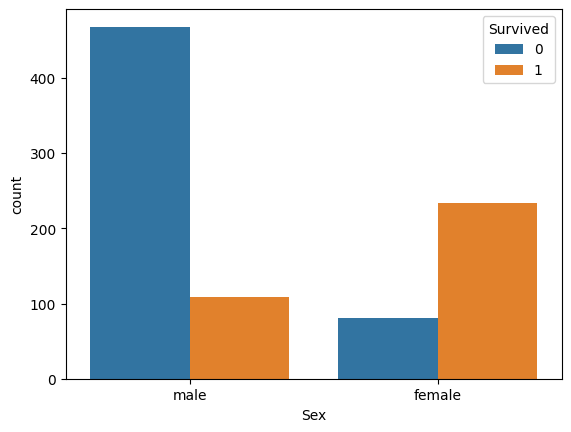

In [35]:
sns.countplot(x='Sex', hue='Survived', data=titanic_dataset)

<Axes: xlabel='Pclass', ylabel='count'>

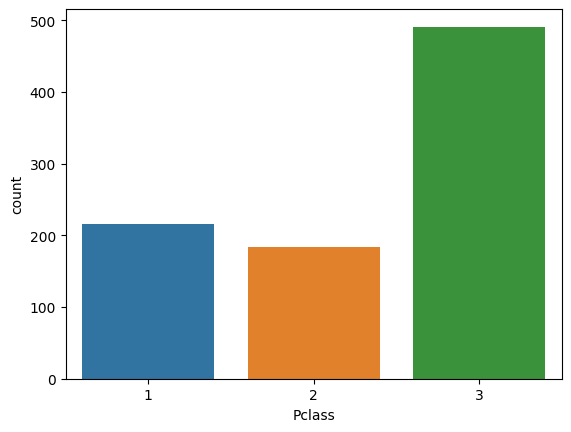

In [37]:
sns.countplot(x=titanic_dataset['Pclass'])

<Axes: xlabel='Pclass', ylabel='count'>

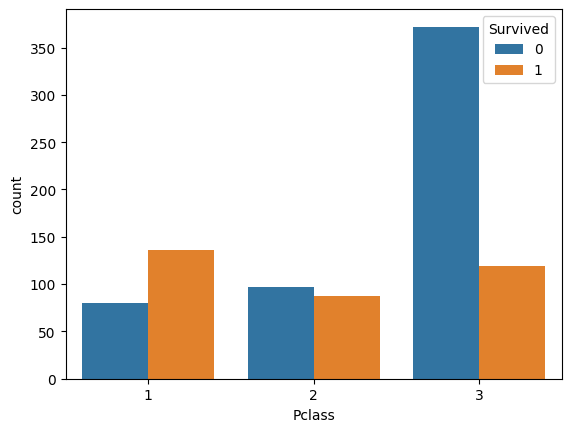

In [38]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_dataset)

Encoding the categorical columns

In [42]:
titanic_dataset['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [41]:
titanic_dataset['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [44]:
titanic_dataset.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [45]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


Separating features and target

In [47]:
X=titanic_dataset.drop(columns=['PassengerId','Name','Ticket','Fare','Survived'],axis=True)
Y=titanic_dataset['Survived']

In [48]:
print(X)

     Pclass  Sex        Age  SibSp  Parch  Embarked
0         3    0  22.000000      1      0         0
1         1    1  38.000000      1      0         1
2         3    1  26.000000      0      0         0
3         1    1  35.000000      1      0         0
4         3    0  35.000000      0      0         0
..      ...  ...        ...    ...    ...       ...
886       2    0  27.000000      0      0         0
887       1    1  19.000000      0      0         0
888       3    1  29.699118      1      2         0
889       1    0  26.000000      0      0         1
890       3    0  32.000000      0      0         2

[891 rows x 6 columns]


Spliting the data into testing and training data

In [49]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,stratify=Y,random_state=2,test_size=0.2)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [51]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
print(lr.score(X_test,Y_test))
print(lr.score(X_train,Y_train))


0.7821229050279329
0.8019662921348315


In [52]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
print(dtc.score(X_test,Y_test))
print(dtc.score(X_train,Y_train))

0.8156424581005587
0.9410112359550562


In [94]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
print(rfc.score(X_test, Y_test))
print(rfc.score(X_train, Y_train))

0.8324022346368715
0.9410112359550562


In [54]:
abc = AdaBoostClassifier()
abc.fit(X_train, Y_train)
print(abc.score(X_test,Y_test))
print(abc.score(X_train,Y_train))

0.8100558659217877
0.827247191011236


In [55]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)
print(gbc.score(X_test,Y_test))
print(gbc.score(X_train,Y_train))

0.8435754189944135
0.8764044943820225


In [62]:
svc = SVC(gamma='auto')
svc.fit(X_train, Y_train)
print(svc.score(X_test, Y_test))
print(svc.score(X_train,Y_train))

0.8100558659217877
0.8735955056179775


In [70]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
print(knn.score(X_test, Y_test))
print(knn.score(X_train,Y_train))

0.7821229050279329
0.8342696629213483


In [57]:
g = GaussianNB()
g.fit(X_train, Y_train)
print(g.score(X_train, Y_train))
print(g.score(X_test,Y_test))

0.7879213483146067
0.7877094972067039


In [71]:
Algorithm=['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier','SVC','KNeighborsClassifier','GaussianNB']
test=[78,81,83,81,84,81,78,78]
train=[80,94,94,82,87,87,83,78]


In [72]:
Train_dict = {'Algorithm' : pd.Series(Algorithm), 'test':pd.Series(test),'train':pd.Series(train)}


In [73]:
dframe = pd.DataFrame(Train_dict)

In [74]:
dframe

,Algorithm,test,train
0,LogisticRegression,78,80
1,DecisionTreeClassifier,81,94
2,RandomForestClassifier,83,94
3,AdaBoostClassifier,81,82
4,GradientBoostingClassifier,84,87
5,SVC,81,87
6,KNeighborsClassifier,78,83
7,GaussianNB,78,78


<Axes: xlabel='Algorithm'>

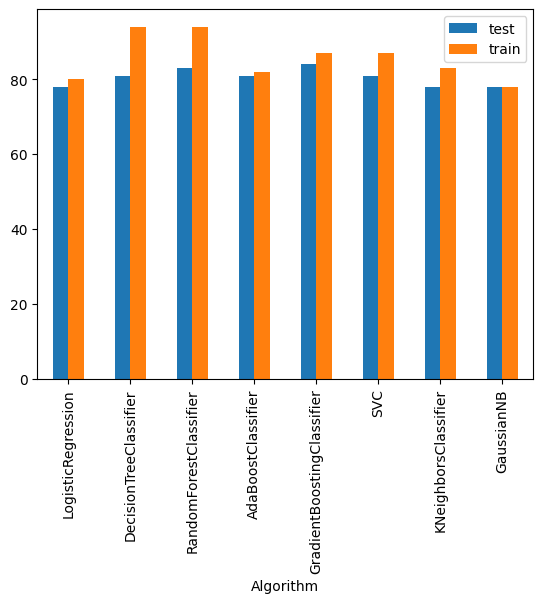

In [75]:
dframe.plot.bar(x='Algorithm')

RandomForestClassifier model provided better **results**

Model Evaluation

In [101]:
#accuracy on the Random Forest on the training data
X_train_prediction=rfc.predict(X_train)
rtraining_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data:',rtraining_data_accuracy)

Accuracy on training data: 0.9410112359550562


In [100]:
#accuracy on the test data
X_test_prediction=rfc.predict(X_test)
rtest_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print('Accuracy on test data:',rtest_data_accuracy)

Accuracy on test data: 0.8324022346368715
